### Introduction

This is a demonstration of unsupervised machine learning methods. The data used features variables of different qualities that pertain to red wine. The link to the data source is pasted below:

Data Source Link: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [2]:
# importing the data and required packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline
plt.style.use('seaborn-white')

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### K-means clustering to identify wines of high vs low quality

In [3]:
# prep data by scaling it
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
X.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
5,-0.528360,0.738418,-1.391472,-0.524166,-0.264960,-0.274931,-0.196679,0.558274,1.288643,-0.579207,-0.960246,-0.787823
6,-0.241094,0.403229,-1.083370,-0.666062,-0.392483,-0.083669,0.381091,-0.183745,-0.072005,-1.169337,-0.960246,-0.787823
7,-0.585813,0.682553,-1.391472,-0.949853,-0.477498,-0.083669,-0.774449,-1.137769,0.511130,-1.110324,-0.397043,1.689519
8,-0.298547,0.291499,-1.288771,-0.382271,-0.307468,-0.657454,-0.865676,0.028261,0.316751,-0.520193,-0.866379,1.689519
9,-0.470907,-0.155419,0.457144,2.526589,-0.349975,0.107592,1.688677,0.558274,0.251958,0.837107,0.072294,-0.787823


Text(0.5, 1.0, 'Elbow curve')

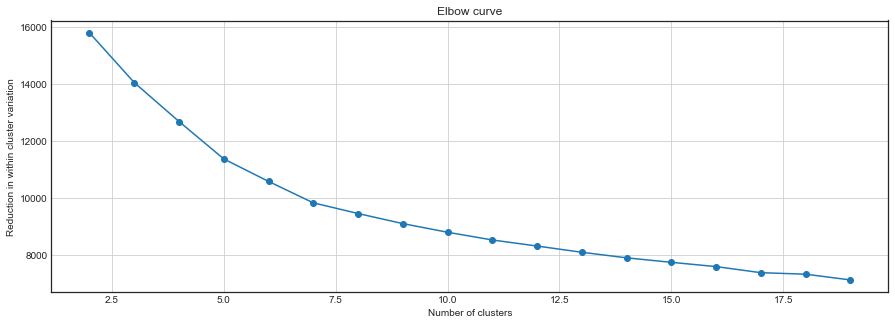

In [3]:
within_cluster_variance = [] # initiate empty list with no data

# build models for range of ks from 2 to 20 to determine which k number is the most optimal
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    within_cluster_variance.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), within_cluster_variance, marker='o')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in within cluster variation')
plt.title('Elbow curve')

In [4]:
np.random.seed(4)
km = KMeans(n_clusters=5, n_init=20)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
pd.Series(km.labels_).value_counts()

0    554
2    358
1    335
3    323
4     29
dtype: int64

In [6]:
km.cluster_centers_

array([[-0.48158827,  0.67836803, -0.7851846 , -0.23083421, -0.07609385,
        -0.39999324, -0.36738626, -0.08666801,  0.40376533, -0.42091513,
        -0.44019218, -0.46809348],
       [-0.60021879, -0.46959542, -0.11844067, -0.22502065, -0.37846163,
         0.17824467, -0.20784397, -1.13829146,  0.53124432,  0.19412902,
         1.21247716,  0.82429842],
       [ 1.36726989, -0.67497657,  1.14004813,  0.1982924 , -0.01490265,
        -0.53858341, -0.52344787,  0.83323017, -0.84119353,  0.3303861 ,
         0.17210406,  0.40240871],
       [-0.07424933,  0.07002941,  0.10325541,  0.44538042,  0.03634236,
         1.10446142,  1.38326937,  0.38903108, -0.15966631, -0.17963501,
        -0.61403192, -0.46569148],
       [ 0.08183134,  0.01795477,  1.14417813, -0.39939594,  5.60473128,
        -0.070479  ,  0.47441556,  0.18580277, -1.68735655,  3.72060836,
        -0.88256287, -0.36069471]])

In [7]:
# Prepping for Visualization and Analysis
X["K-Means Cluster"] = km.labels_
centers = km.cluster_centers_

In [8]:
# Cluster means for scaled data
display(X.groupby("K-Means Cluster").mean())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
K-Means Cluster,,,,,,,,,,,,
0,-0.481588,0.678368,-0.785185,-0.230834,-0.076094,-0.399993,-0.367386,-0.086668,0.403765,-0.420915,-0.440192,-0.468093
1,-0.600219,-0.469595,-0.118441,-0.225021,-0.378462,0.178245,-0.207844,-1.138291,0.531244,0.194129,1.212477,0.824298
2,1.367270,-0.674977,1.140048,0.198292,-0.014903,-0.538583,-0.523448,0.833230,-0.841194,0.330386,0.172104,0.402409
3,-0.074249,0.070029,0.103255,0.445380,0.036342,1.104461,1.383269,0.389031,-0.159666,-0.179635,-0.614032,-0.465691
4,0.081831,0.017955,1.144178,-0.399396,5.604731,-0.070479,0.474416,0.185803,-1.687357,3.720608,-0.882563,-0.360695


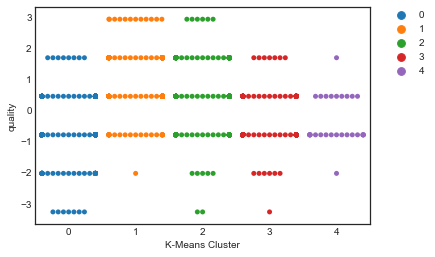

In [9]:
sns.swarmplot(x="K-Means Cluster", y="quality", hue="K-Means Cluster", data=X)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

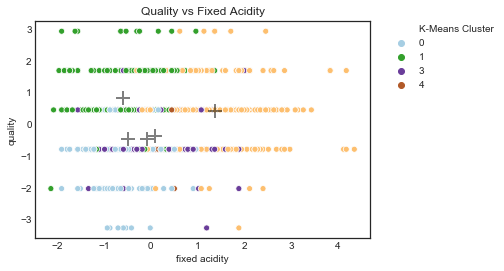

In [10]:
sns.scatterplot(x="fixed acidity", y="quality", hue="K-Means Cluster", palette= "Paired", data=X)
plt.scatter(centers[:, 0], centers[:, 11], c='k', s=200, alpha=0.5, linewidth=2,marker='+')
plt.title('Quality vs Fixed Acidity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

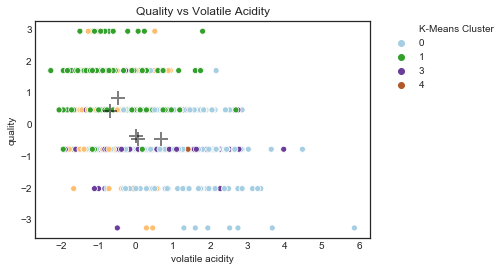

In [11]:
sns.scatterplot(x="volatile acidity", y="quality", hue="K-Means Cluster", palette= "Paired", data=X)
plt.scatter(centers[:, 1], centers[:, 11], c='k', s=200, alpha=0.5, linewidth=2,marker='+')
plt.title('Quality vs Volatile Acidity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

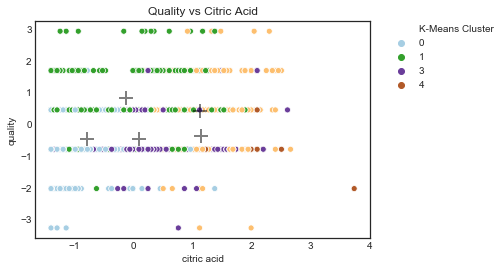

In [12]:
sns.scatterplot(x="citric acid", y="quality", hue="K-Means Cluster", palette= "Paired", data=X)
plt.scatter(centers[:, 2], centers[:, 11], c='k', s=200, alpha=0.5, linewidth=2,marker='+')
plt.title('Quality vs Citric Acid')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

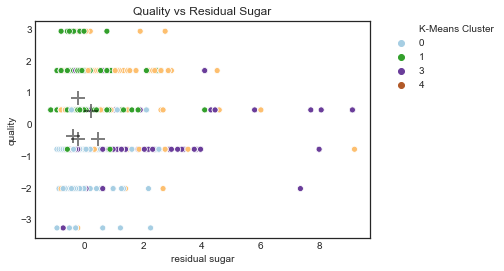

In [13]:
sns.scatterplot(x="residual sugar", y="quality", hue="K-Means Cluster", palette= "Paired", data=X)
plt.scatter(centers[:, 3], centers[:, 11], c='k', s=200, alpha=0.5, linewidth=2,marker='+')
plt.title('Quality vs Residual Sugar')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

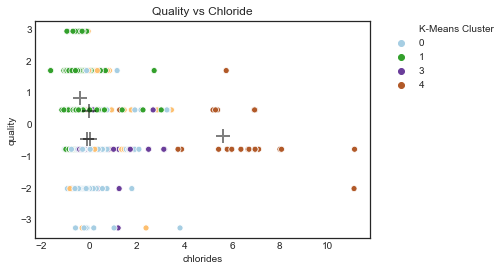

In [14]:
sns.scatterplot(x="chlorides", y="quality", hue="K-Means Cluster", palette= "Paired", data=X)
plt.scatter(centers[:, 4], centers[:, 11], c='k', s=200, alpha=0.5, linewidth=2,marker='+')
plt.title('Quality vs Chloride')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

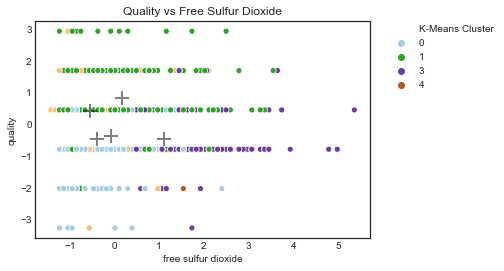

In [15]:
sns.scatterplot(x="free sulfur dioxide", y="quality", hue="K-Means Cluster", palette= "Paired", data=X)
plt.scatter(centers[:, 5], centers[:, 11], c='k', s=200, alpha=0.5, linewidth=2,marker='+')
plt.title('Quality vs Free Sulfur Dioxide')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

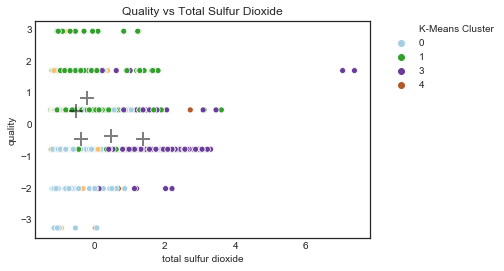

In [16]:
sns.scatterplot(x="total sulfur dioxide", y="quality", hue="K-Means Cluster", palette= "Paired", data=X)
plt.scatter(centers[:, 6], centers[:, 11], c='k', s=200, alpha=0.5, linewidth=2,marker='+')
plt.title('Quality vs Total Sulfur Dioxide')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

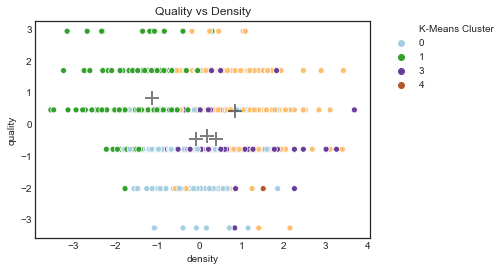

In [17]:
sns.scatterplot(x="density", y="quality", hue="K-Means Cluster", palette= "Paired", data=X)
plt.scatter(centers[:, 7], centers[:, 11], c='k', s=200, alpha=0.5, linewidth=2,marker='+')
plt.title('Quality vs Density')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

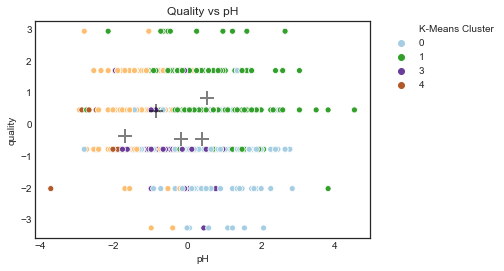

In [18]:
sns.scatterplot(x="pH", y="quality", hue="K-Means Cluster", palette= "Paired", data=X)
plt.scatter(centers[:, 8], centers[:, 11], c='k', s=200, alpha=0.5, linewidth=2,marker='+')
plt.title('Quality vs pH')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

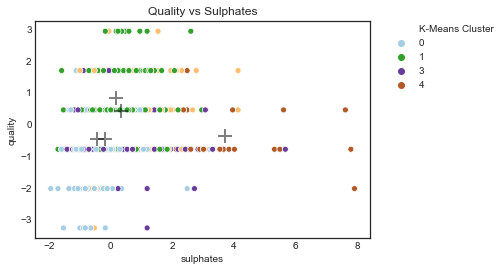

In [19]:
sns.scatterplot(x="sulphates", y="quality", hue="K-Means Cluster", palette= "Paired", data=X)
plt.scatter(centers[:, 9], centers[:, 11], c='k', s=200, alpha=0.5, linewidth=2,marker='+')
plt.title('Quality vs Sulphates')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

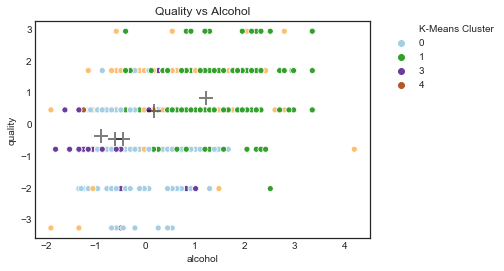

In [20]:
sns.scatterplot(x="alcohol", y="quality", hue="K-Means Cluster", palette= "Paired", data=X)
plt.scatter(centers[:, 10], centers[:, 11], c='k', s=200, alpha=0.5, linewidth=2,marker='+')
plt.title('Quality vs Alcohol')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

I, first, made a graph to determine the optimal level of k clusters based on its inertia, which is the sum of distances of data points to their identified cluster centers. Although it doesn't seem to provide an obvious elbow of an appearance, it seems 5-6 is the right number to prevent overfitting of data, and I opted to use 5.
<br>
<br>
With that in mind, I used the mean of wine quality to identify and analyze the clusters that have high and low values of the wine quality. It seems cluster 1 has the highest mean for the quality of wine (0.824298), whereas cluster 0 has the lowest mean for the quality of wine (-0.468093). Next, I analyzed the direction and magnitude of the values of the means for different variables based on its respective clusters.
<br>
<br>
Based on the different means of the variables for cluster 1, wines with higher quality seem to have high negative mean values of fixed acidity, volatile acidity, chlorides and density to a significant extent compared to other negative mean values of other variables within the cluster. On the other hand, they seem to have high positive mean values of pH and alcohol content relative to other positive mean values.
<br>
<br>
Next, we take our analysis for cluster 0 that has the lowest quality of wine in relation to other clusters. They share high negative mean values of fixed acidity, citric acid, sulphates and alcohol to a significant extent compared to negative mean values of other variables within the cluster. On the other hand, they seem to have high positive mean values of volatile acidity and pH levels. 
<br>
<br>
Since cluster 3 also seem to have a similar low negative mean value for quality (-0.465691), I compared if the same variables hold similar magnitude and direction for their mean values. This was not the case, however, as fixed acidity, citric acid and sulphates did not have high negative mean values. Instead, the only high negative mean value seems to be alcohol. I repeated this with cluster 2 with a high mean value of wine quality of 0.402409, and it conveys high positive mean value for fixed acidity, citric acid and density, and high negative mean value for volatile acidity, free sulfur dioxide, total sulfur dioxide and pH.

Therefore,  it is important to note that the similar values of the mean for the described variables are not shared across all variables in terms of its direction and magnitude. This demonstrates that K-mean clustering did not produce a high quality of clusters due to the nature of the dataset, and clustering might not be an ideal model for unsupervised learning in this case.
With that in mind, I took it a step further by visualizing the clusters in relation to the variables, and tried to analyze and identify any potential correlation or relationships to gain more accurate insights. Visualizing provides greater information on the spread of the data and allows us to actually compare the predictive power of the independent variables against wine quality, instead of simply looking at the means of the columns based on clusters.
<br>
<br>
As such, I initially plotted a swarm plot to identify which clusters have high values of wine quality against low values. From the first graph, it seems clusters 1 and 2 contain generally higher values compared to other clusters, whereas cluster 0 seems to have the highest number of concentrations for low quality of wine. This agrees with the identified clusters from the initial means analysis.
<br>
<br>
However, when assessing the relationship between variables and wine quality, there were some minor discreprancies. I plotted sets of graphs for each column as the independent variable and wine quality as the dependent variable grouped by their identified clusters, and their centroid clusters were plotted. In this way, the relationship between the variable of interest and wine quality can be evaluated based on their clusters case by case.
<br>
<br>
1) Fixed Acidity
<br>
There doesn't to be a signficiant correlation or relationship shared between fixed acidity and wine quality for any of the clusters.

2) Volatile Acidity
<br>
Clusters 1 and 2 seem to have lower volatile acidity, while cluster 0 have higher volatile acidity. As such, lower volatile acidity is matched with higher quality.

3) Citric Acid
<br>
The plot seems very similar to that of the fixed acidity pattern. As such, cluster 2 demonstrate that higher citric acid have higher wine quality, although this is not case with clusters 0 and 1 where they both have low citric acid.

4) Residual Sugar
<br>
Residual sugar does not seem to play any significant part in determining the wine quality for any of the clusters. However, it seems like higher residual levels indicate lower quality for datapoints in cluster 3, although not significant.

5) Chloride
<br>
Level of chloride also does not seem to play any significant part in determining the wine quality for any of the clusters. However, it seems like higher chloride levels indicate lower quality for datapoints in cluster 4.

6) Free Sulfur Dioxide
<br>
Amount of free sulfur dioxide also does not seem to play any significant part in determining the wine quality for any of the clusters. However, it seems like higher sulfur dioxide lead to medium quality of wine for datapoints in cluster 3.

7) Total Sulfur Dioxide
<br>
Similarly, amount of total sulfur dioxide also does not seem to play any significant part in determining the wine quality for any of the clusters.

8) Density
<br>
Density emits an interesting pattern, where higher values at lower end of the spectrum indicates higher wine quality as shared by clusters 1 and 2. However, values centered around the middle indicates medium wine quality as demonstrated by cluster 0.

9) pH
<br>
There doesn't seem to be any significant correlation with pH, however there are a few data points where higher pH indicated higher wine quality for cluster 1, although this is not significant.

10) Sulphates
<br>
Although there are both good and bad quality wines with lower levels of sulphates, medium quality wines seems to generally have higher levels of sulphates, which is demonstrated by clusters 1, 2 and 4.

11) Alcohol
<br>
Higher quality wine seems to have higher alcohol content, which is indicated by the datapoints in clusters 1 and 2. Lower quality wines seem to have lower alcohol content, as demonstrated by clusters 0 and 3.
<br>
<br>
After intrepreting and sythnesizing the different results based on visualization, the most important variables to determine good quality wine is lower volatile acidity, higher citric acid (although not significant), lower density, higher pH levels (not significant), and higher alcohol level. On the side note, it is also worth mentioning to avoid high levels of residual sugar and chloride (although low levels do not determine if the wine is good or bad in quality).
<br>
<br>
Considering all the factors mentioned above, when comparing the first approach (means analysis) with the second approach (visualization), it seems like solely looking at the means might not be the ideal method, as clusters with similar quality of wine might have different mean values in terms of both magnitude and direction for the same variable(s). This makes sense to some extent as this is not a evaluation of the strength of the relationship between quality of wine and variables of interest, but instead is just looking at the composition of the clusters in relation to their means of their variables who demonstrate either high or low mean value of wine quality.
<br>
<br>
Therefore, it is ideal to combine both approaches to determine the most important characteristics of good quality wine, in this case, and a consensus was reached on certain variables, which are lower volatile acidity, lower density and higher alcohol level, in conclusion.

### Implementing agglomerative clustering instead of k-mean clustering

In [21]:
ac = AgglomerativeClustering(n_clusters=5, # since the instructions told us to choose the same number of clusters as K-means clustering
                             affinity='euclidean',
                             linkage='complete')
hc = ac.fit(X)    # extract cluster labels for each observation in data
pd.Series(hc.labels_).value_counts()

1    822
0    732
2     24
4     19
3      2
dtype: int64

In [22]:
hc.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [23]:
X['Hierachical Cluster'] = hc.labels_
display(X.groupby("Hierachical Cluster").mean()) #cluster means

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,K-Means Cluster
Hierachical Cluster,,,,,,,,,,,,,
0,0.641658,-0.372391,0.667457,0.045548,0.128233,0.154754,0.270589,0.472386,-0.502187,0.270356,-0.091076,0.044727,2.356557
1,-0.557645,0.343898,-0.615718,-0.236707,-0.153986,-0.245963,-0.334592,-0.462066,0.470536,-0.241353,0.108664,-0.020811,0.341849
2,-0.152521,-0.184515,0.256022,5.666029,0.239815,1.354777,1.133713,1.319948,-0.260984,-0.193163,-0.576955,-0.116876,2.708333
3,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158,4.000000
4,-0.410430,-0.261268,0.270661,1.324211,0.248485,2.926183,2.584941,0.042766,-0.399380,-0.333836,-0.362460,-0.527050,3.000000


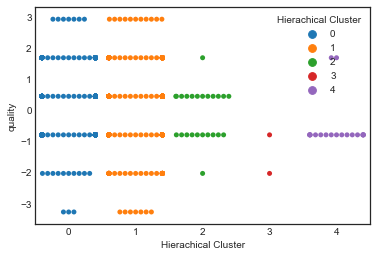

In [24]:
sns.swarmplot(x="Hierachical Cluster", y="quality", hue='Hierachical Cluster', data=X)

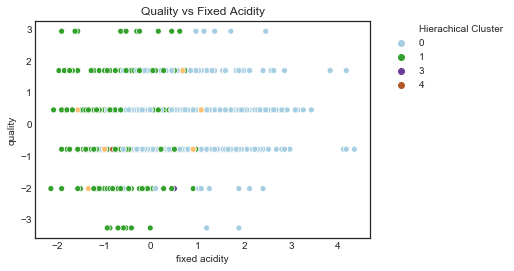

In [25]:
sns.scatterplot(x="fixed acidity", y="quality", hue='Hierachical Cluster', palette= "Paired", data=X)
plt.title('Quality vs Fixed Acidity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

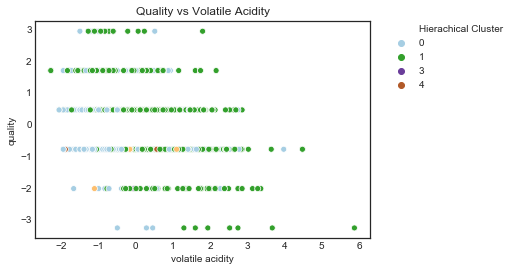

In [26]:
sns.scatterplot(x="volatile acidity", y="quality", hue='Hierachical Cluster', palette= "Paired", data=X)
plt.title('Quality vs Volatile Acidity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

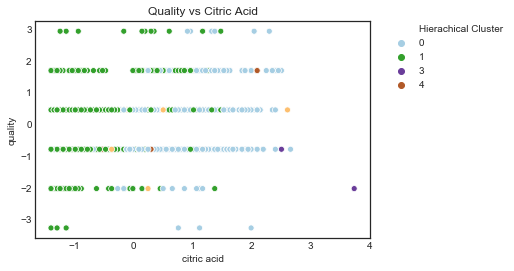

In [27]:
sns.scatterplot(x="citric acid", y="quality", hue='Hierachical Cluster', palette= "Paired", data=X)
plt.title('Quality vs Citric Acid')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

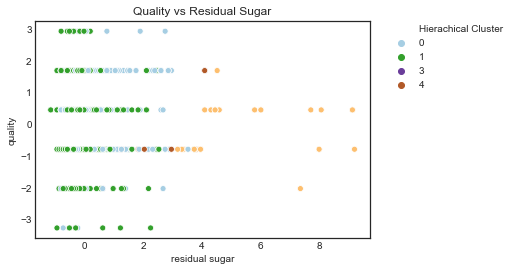

In [28]:
sns.scatterplot(x="residual sugar", y="quality", hue='Hierachical Cluster', palette= "Paired", data=X)
plt.title('Quality vs Residual Sugar')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

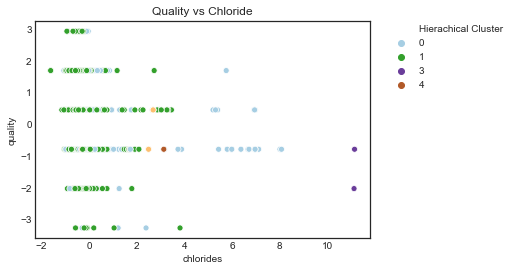

In [29]:
sns.scatterplot(x="chlorides", y="quality", hue='Hierachical Cluster', palette= "Paired", data=X)
plt.title('Quality vs Chloride')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

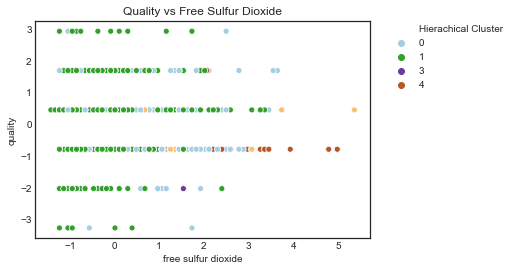

In [30]:
sns.scatterplot(x="free sulfur dioxide", y="quality", hue='Hierachical Cluster', palette= "Paired", data=X)
plt.title('Quality vs Free Sulfur Dioxide')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

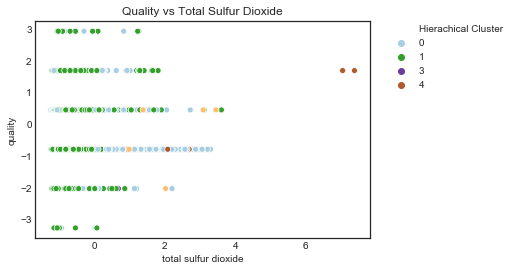

In [31]:
sns.scatterplot(x="total sulfur dioxide", y="quality", hue='Hierachical Cluster', palette= "Paired", data=X)
plt.title('Quality vs Total Sulfur Dioxide')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

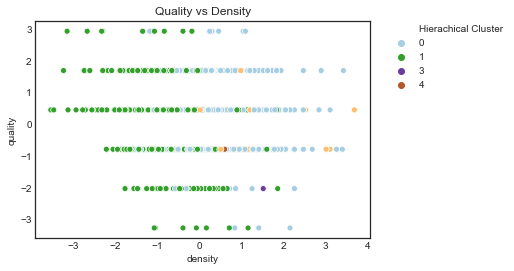

In [32]:
sns.scatterplot(x="density", y="quality", hue='Hierachical Cluster', palette= "Paired", data=X)
plt.title('Quality vs Density')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

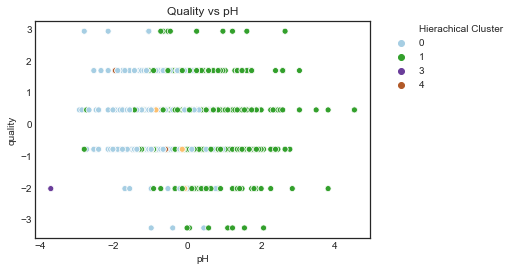

In [33]:
sns.scatterplot(x="pH", y="quality", hue='Hierachical Cluster', palette= "Paired", data=X)
plt.title('Quality vs pH')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

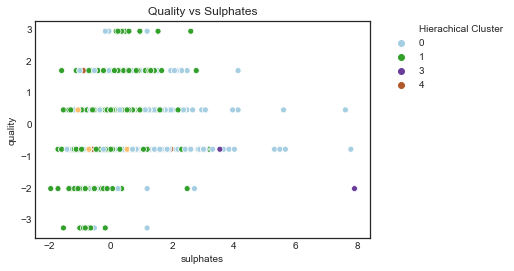

In [34]:
sns.scatterplot(x="sulphates", y="quality", hue='Hierachical Cluster', palette= "Paired", data=X)
plt.title('Quality vs Sulphates')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

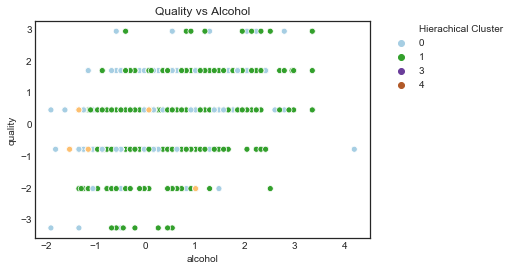

In [35]:
sns.scatterplot(x="alcohol", y="quality", hue='Hierachical Cluster', palette= "Paired", data=X)
plt.title('Quality vs Alcohol')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Following the same approach but now integrating agglomerative clustering instead of k-means clustering, the means of the variables based on the clusters changed in comparison to means of K-means clustering, and the way in which the datapoints were clustered also differed. The difference resulting from the two clustering methdologies makes sense as the complete linkage computes all pairwise dissimilarities between the observations in the different clusters, and records the largest of the inter-cluster dissimilarities, whereas k-means clustering tries to partition the datapoints into clusters of same size.
<br>
<br>
The cluster with relatively high values of wine quality compared to other clusters is cluster 0 (0.044727), and cluster with relatively low values of wine quality is cluster 3 (-1.407158). One needs to take into account the highest mean value is still very low in its magnitude. Using the same visualization approach as in question 1, this is consistent with the output of the swarm plot. It seems that cluster 0 has generally higher mean value of wine quality than the rest of the clusters, and cluster 3 with lower mean wine quality.
<br>
<br>
However, the swarm plot also provides additional information on how the data points are allocated and concentrated in relation to measuring for wine quality. As such, you can see from the first graph that most of the data points are in cluster 1 and the second largest number of concentrations being in cluster 0 (Cluster number 1), while the rest of the data points are, in fact, pretty lacking in the remaining 3 clusters. Therefore, cluster 3 is not useful because it has such few data points. This demonstrates the importance of visualizing the data points, in addition to just looking at the means. Moreover, it seems to have large concentration of datapoints spread out through every almost every value of wine quality for cluster 1. 
<br>
<br>
Next, I tried to analyze the composition of the clusters with high and low values of wine quality using the means. It seems cluster 0 (highest mean of wine quality) is comprised of high positive mean values of fixed acidity, citric acid and density, and has high negative mean values of volatile acidity and pH relative to the means of other variables. On the other hand, cluster 3 has the lowest mean value of quality of wine, and its datapoints within the cluster consists of high positive mean values of citric acid, chlorides and sulphates, while having high negative mean values of pH and alcohol content. 
<br>
<br>
However, since it was noted earlier that cluster 3 has such low number of datapoints, it would be more useful to analyze another cluster with the next lowest mean of wine quality, which is cluster 4 (-0.527050), and this cluster consists of datapoints that have high positive mean values of residual sugar, free sulfur dioxide and total sulfur dioxide, and high negative mean values of fixed acidity, pH, sulphates, and alcohol. As you can see again, the significan mean values is not consistent, even when compared with clusters with low mean values of wine quality. Therefore, the same composition doesn't carry over. Again, this demonstrates that clustering might not be a good model for unsupervised learning for this dataset.
<br>
<br>
Now, when comparing the means analysis for hiearchical clustering with the means analysis of K clustering, clusters with high quality of wine seem to pick up on similar variables of significant mean value. For example, for clusters with high mean value of wine quality, hierarchial cluster and k-mean cluster both express significance in the magnitude of its mean values for fixed acidity, volatile acidity, density and pH, even though some differ in their directions. When comparing the clusters with low mean quality of wine, they seem to agree on higher negative mean values for variables of fixed acidity, sulphates and alochol, but have discprenancies on the rest of the variables.
<br>
<br>
The next approach is exploring the contributory variables to wine quality visually through plotting the graphs of the variables against wine quality to gain more insights about any potential relationship between the variables and wine quality, as I did in K-means clustering due to the advantages highlighted in the earlier section.
<br>
<br>
1) Fixed Acidity
<br>
There doesn't seem to be any significant patterns or correlations between fixed acidity and quality of wine.

2) Volatile Acidity
<br>
Even though the correlation is not strong, there seems to be a slight inverse relationship shared across all clusters between quality and volatile acidity, where lower volatile acidity indicates better wine quality.

3) Citric Acid
<br>
Citric acid doesn't seem to have any significant relationship with quality of the wine, however, after a certain threshold, higher citric acid does seem to indiciate higher wine quality for majority of the clusters.

4) Residual Sugar
<br>
Residual sugar also does not seem to play any significant part in determining the wine quality for any of the clusters. However, for cluster 2, higher residual sugar levels indicates lower quality of wine.

5) Chloride
<br>
Level of chloride also does not seem to play any significant part in determining the wine quality for any of the clusters. However, for clusters 0 and 3, higher chlorides levels indicate lower quality in wine.

6) Free Sulfur Dioxide
<br>
Amount of free sulfur dioxide also does not seem to play any significant part in determining the wine quality for any of the clusters.

7) Total Sulfur Dioxide
<br>
Similarly, amount of total sulfur dioxide also does not seem to play any significant part in determining the wine quality for any of the clusters.

8) Density
<br>
Higher values at the lower end of the spectrum indicates higher wine quality as demonstrated by cluster 1. However, values centered around the middle indicate does not really indicate any specific relationship with wine quality for any of the clusters, whereas values for higher density indicates generally medium wine quality.

9) pH
<br>
There doesn't seem to be any significant correlation with pH.

10) Sulphates
<br>
Although there are both good and bad quality wines with lower levels of sulphates, most wine usually rests for medium quality for high levels of sulphates as demonstrated by cluster 0.

11) Alcohol
<br>
Higher quality wine seems to have higher alcohol content, which is indicated by the datapoints in clusters 0 and 1, and vice versa.
<br>
<br>
Considering the results based on the visual scatterplot analysis, higher wine quality is matched with lower volatile acidity, higher citric acid, lower density and higher alcohol content. There seems to be some similarities shared between the means and visual analysis for hierarchical clustering when evaluating what characteristics determine a good quality wine. There is agreed consensus on that their is negative relationship shared between volatile acidity and wine quality, and positive relationship shared for citiric acid and density. When looking at this at a more higher level and comparing the overall conclusion between k-means and hierarchical clustering for determine good wine, most of the variables seem to be generally consistent in relation with their impact on the wine quality (especially when comparing the visual analysis side by side). 
<br>
<br>
As a result and considering all the factors mentioned above, it is determined that the most important variables for determining good quality wine is also lower volatile acidity, higher citric acid, lower density, and higher alcohol levels. The only exceptions are that some variables can be noted to have more significance than others. For example, pH levels is determined to not have any significant predictive power in this analysis, but has an impact in the previous analysis (although to an insignificant degree). The very minor exceptions can be attributed to the different ways in which the data points were clustered, which may change the ways in which certain variables are presented visually in relation to different clusters that may have influenced the interpretation to a small extent. However, conceptually, the ways in which the data points are clustered should not have any impact on the predictive power of the variables to wine quality, which is consistent with the results of my analysis.

### Incorporating prinicipal component analysis

In [16]:
pca = PCA(n_components=2)
y = pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1599, 12)
transformed shape: (1599, 2)


In [17]:
print(pca.explained_variance_)

[3.12312087 2.24328497]


In [38]:
variance=np.var(X_pca,axis=0)
variance_ratio = variance/np.sum(variance)
print (variance_ratio)

[0.62480363 0.37519637]


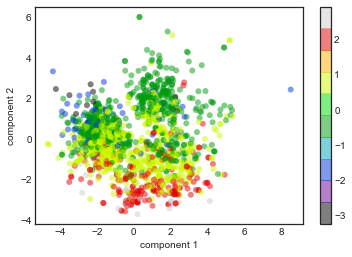

In [39]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=X.quality, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Since the values of the data differ a lot based on the variable, I used the scaled data to reduce the dimensions of the data to two dimensions. When looking at the variance ratio, the determined optimal stretch and rotation in the original 12 dimensional space allows us to see the layout of the different wine attributes in two dimensions in a way that explain more than 99% of the data.
<br>
<br>
To visually represent the reduced data, I have plotted the two principal components and color coded by wine quality. Considering these points are the projection of each data point along the directions with the largest variance, there seems to be some predictive power considering the graph without having to attach any labels, as taught in class. It is somewhat indicative that higher wine quality data points are clustered near the bottom right. In other words, lower values of principal component 2 and higher values of principal component 1 indicate higher wine quality using just two dimensions of data.